In [1]:
# Suppress Future Warnings
import warnings
#warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

# Data Importing

In [2]:
import sklearn
from sklearn import datasets 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import platform
import os
%matplotlib inline

#show the versions of the libraries that are currently in use
message="        Versions        "
print("*"*len(message))
print(message)
print("*"*len(message))
print("Scikit-learn version={}".format(sklearn.__version__))
print("Numpy version={}".format(np.__version__))
print("Pandas version={}".format(pd.__version__))
print("Seaborn version={}".format(sns.__version__))
print("Python version={}".format(platform.python_version()))

Matplotlib is building the font cache; this may take a moment.


************************
        Versions        
************************
Scikit-learn version=0.23.2
Numpy version=1.19.2
Pandas version=1.1.3
Seaborn version=0.11.0
Python version=3.8.5


In [3]:
df_train = pd.read_csv("./test_set.csv")
df_train.head()

,ID,DTNumber,Volume,DDate,DType,MaxTemp,MinTemp,UserNumber,UserName,Terminal,...,A14,A15,A16,A17,A18,A19,A20,A21,A22,A23
0,1,MPB_331,400,2018/7/11,Column transformer,24.1,20.9,T00_58,Name_1,1300261,...,42.96,33.06,33.01,75.85,94.86,86.53,97.31,62.43,53.80,30.46
1,2,MPB_331,400,2018/7/11,Column transformer,24.1,20.9,T00_58,Name_1,1300337,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,3,MPB_331,400,2018/7/12,Column transformer,29.9,20.9,T00_58,Name_1,1300261,...,48.08,44.17,43.77,97.30,121.13,128.42,143.36,99.03,67.09,44.05
3,4,MPB_331,400,2018/7/12,Column transformer,29.9,20.9,T00_58,Name_1,1300337,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
4,5,MPB_331,400,2018/7/13,Column transformer,27.6,24.2,T00_58,Name_1,1300337,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


# Exploratory Data Analysis

In [4]:
#Showing all the information about the dataset

msg="Information of the Train Dataset"
print("*"*len(msg))
print(msg)
print("*"*len(msg))
print(df_train.info())
print()

msg="Columns in the Train Dataset"
print("*"*len(msg))
print(msg)
print("*"*len(msg))
print(df_train.columns)
print()

msg="Shape of the Train Dataset"
print("*"*len(msg))
print(msg)
print("*"*len(msg))
print(df_train.shape)
print()

msg="Descriptive statistical summary of the train dataset is shown below: "
print("*"*len(msg))
print(msg)
print("*"*len(msg))
df_train.describe()

********************************
Information of the Train Dataset
********************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43660 entries, 0 to 43659
Data columns (total 37 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          43660 non-null  int64  
 1   DTNumber    43660 non-null  object 
 2   Volume      43660 non-null  int64  
 3   DDate       43660 non-null  object 
 4   DType       43660 non-null  object 
 5   MaxTemp     43660 non-null  float64
 6   MinTemp     43660 non-null  float64
 7   UserNumber  43660 non-null  object 
 8   UserName    43660 non-null  object 
 9   Terminal    43660 non-null  int64  
 10  EMANumber   43660 non-null  object 
 11  CT          43660 non-null  int64  
 12  PT          43660 non-null  int64  
 13  A0          43660 non-null  float64
 14  A1          43660 non-null  float64
 15  A2          43660 non-null  float64
 16  A3          43660 non-null  float64
 17  A4      

,ID,Volume,MaxTemp,MinTemp,Terminal,CT,PT,A0,A1,A2,...,A14,A15,A16,A17,A18,A19,A20,A21,A22,A23
count,43660.000000,43660.000000,43660.000000,43660.000000,4.366000e+04,43660.000000,43660.0,43660.000000,43660.000000,43660.000000,...,43660.000000,43660.000000,43660.000000,43660.000000,43660.000000,43660.000000,43660.000000,43660.000000,43660.000000,43660.00000
mean,21830.500000,708.689075,30.797861,21.776512,8.552945e+05,247.761338,1.0,60.321797,51.872109,47.051418,...,68.035705,64.919608,64.018671,66.056520,72.893093,80.283911,84.672621,88.319573,86.742525,74.08235
std,12603.700713,432.862297,5.061908,5.271968,5.680783e+05,162.660151,0.0,63.149668,54.517793,49.386592,...,71.497895,66.816474,64.991145,65.904871,71.938439,79.441731,83.398366,87.513258,87.953907,76.84622
min,1.000000,50.000000,16.000000,3.400000,1.300100e+05,60.000000,1.0,0.000000,0.000000,0.000000,...,-18.830000,-7.940000,-3.760000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,10915.750000,315.000000,27.600000,20.500000,1.300490e+05,100.000000,1.0,6.620000,6.127500,5.897500,...,6.360000,6.617500,6.870000,6.907500,7.047500,7.090000,9.537500,9.387500,8.920000,7.51000
50%,21830.500000,500.000000,32.100000,23.400000,1.300157e+06,200.000000,1.0,44.355000,37.960000,34.480000,...,49.810000,48.760000,49.145000,52.480000,59.275000,64.800000,68.615000,70.855000,67.315000,55.43500
75%,32745.250000,1250.000000,34.000000,25.500000,1.300277e+06,400.000000,1.0,90.510000,77.680000,70.380000,...,102.152500,97.840000,96.680000,99.847500,109.920000,121.500000,128.605000,134.160000,131.475000,111.28500
max,43660.000000,2000.000000,41.700000,28.000000,1.300396e+06,800.000000,1.0,481.560000,422.480000,390.800000,...,544.740000,478.380000,483.120000,542.520000,637.740000,586.920000,604.160000,592.000000,593.440000,537.12000


In [5]:
#List out the missing values 

df_train.isnull().sum()

ID            0
DTNumber      0
Volume        0
DDate         0
DType         0
MaxTemp       0
MinTemp       0
UserNumber    0
UserName      0
Terminal      0
EMANumber     0
CT            0
PT            0
A0            0
A1            0
A2            0
A3            0
A4            0
A5            0
A6            0
A7            0
A8            0
A9            0
A10           0
A11           0
A12           0
A13           0
A14           0
A15           0
A16           0
A17           0
A18           0
A19           0
A20           0
A21           0
A22           0
A23           0
dtype: int64

In [6]:
#drop ID column (unwanted column)
df_train=df_train.drop(['ID'],axis=1)

<AxesSubplot:>

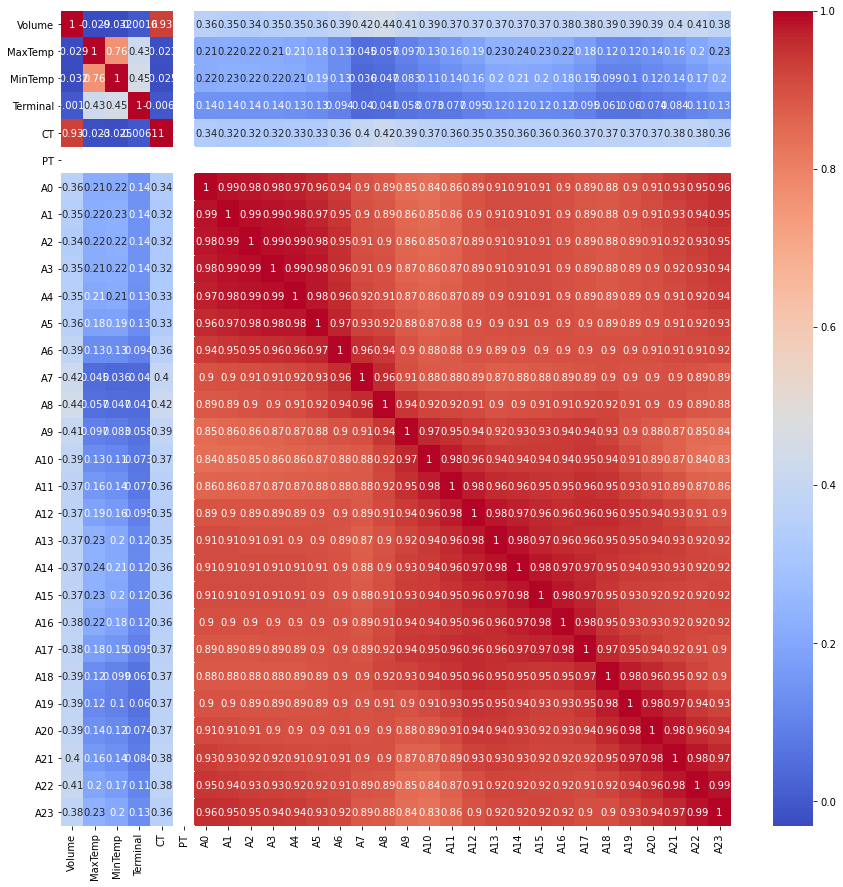

In [7]:
#heatmap (correlation analysis) -overview 
plt.figure(figsize=(15,15))
sns.heatmap(df_train.corr(),annot=True,cmap='coolwarm')

In [8]:
# Seperated the columns into catergorical variables and numerical variables

num_vars=list(df_train.columns[df_train.dtypes != "object"])
cat_vars=list(df_train.columns[df_train.dtypes == "object"])
print("Categorical Variables: ",cat_vars)
print("Numerical Variables: ",num_vars)

Categorical Variables:  ['DTNumber', 'DDate', 'DType', 'UserNumber', 'UserName', 'EMANumber']
Numerical Variables:  ['Volume', 'MaxTemp', 'MinTemp', 'Terminal', 'CT', 'PT', 'A0', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18', 'A19', 'A20', 'A21', 'A22', 'A23']


Text(0.5, 1.0, 'Minimum Temperature of the Transformer')

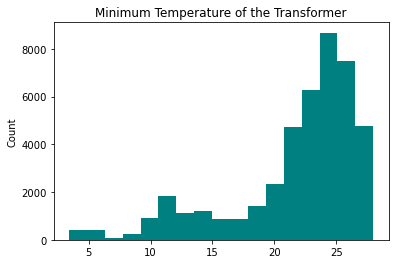

In [9]:
#Show the Minimum Temperature of the Transformer

plt.hist(df_train['MinTemp'], bins=17,color='teal')
plt.ylabel('Count')
plt.title('Minimum Temperature of the Transformer')

Text(0.5, 1.0, 'Minimum Temperature of the Transformer')

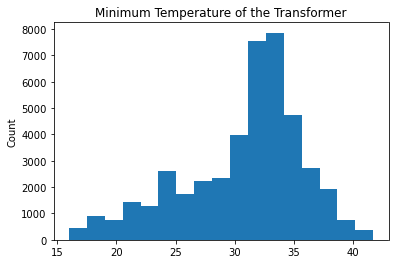

In [10]:
#Show the Maximum Temperature of the Transformer

plt.hist(df_train['MaxTemp'], bins=17)
plt.ylabel('Count')
plt.title('Minimum Temperature of the Transformer')

In [11]:
#convert DDate into Datetime function 
df_train['DDate'] =pd.to_datetime(df_train.DDate, format='%Y/%m/%d')

#extract day of week 
df_train['dayofWeek'] = df_train['DDate'].dt.dayofweek
df_train['dayofWeek'].head()

# 0 = Monday 

0    2
1    2
2    3
3    3
4    4
Name: dayofWeek, dtype: int64

ValueError: Could not interpret input 'Is_gz'

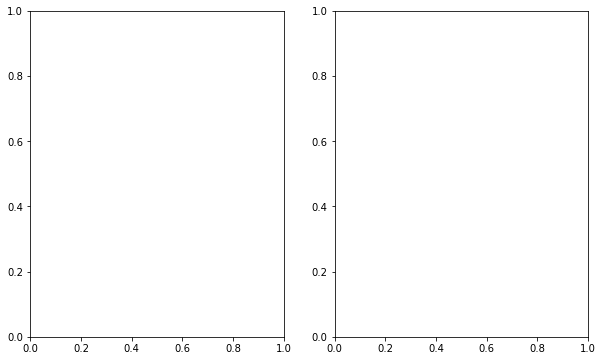

In [16]:
# #Average Age for Respective Sex 
# sns.boxplot(y='MaxTemp',x='dayofWeek',data=df_train)
# plt.title('Minimum Temperature of Distribution Transformer by Day')

#Temperature of Distribution Transformer by Day -- Column and Distrubution 
f,ax=plt.subplots(1,2,figsize=(10,6))
sns.violinplot('DType','MinTemp',hue='Is_gz',data=df_train,split=True,ax=ax[0], palette="Set3")
ax[0].set_title('Minimum Temperature of Distribution Transformer by Day')
ax[0].set_yticks(range(0,110,10))

sns.violinplot('DType','MaxTemp', hue='Is_gz', data=df_train,split=True,ax=ax[1],palette="Set2")
ax[1].set_title('Maximum Temperature of Distribution Transformer by Day')
ax[1].set_yticks(range(0,110,10))

plt.subplots_adjust(right=1.5, top=0.9)
plt.show()

In [17]:
#show the total number of passengers in each ageGroup groupby survival rate 
print(df_train.groupby(['DType', 'Volume'])['Is_gz'].count())

#barplot showing survival rate based on Age Group
sns.barplot(x='Volume',y='Is_gz',hue='DType',data=df_train)
plt.title("Overload Rate based on Volume",fontsize=14)
plt.xlabel("Volume")
plt.ylabel("Overload Rate")

plt.show()

KeyError: 'Column not found: Is_gz'

In [26]:
# loading_value = df_train['A0', 'A1','A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10',
#                         'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18','A19','A20',
#                         'A21','A22','A23']
# plt.plot('Volume',['A0', 'A1','A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10'
#                         'A11', 'A12', 'A13', 'A14', 'A15', 'A16', 'A17', 'A18','A19','A20',
#                         'A21','A22','A23'], data = df_train, figsize=(15,15))


AttributeError: module 'matplotlib.pyplot' has no attribute 'barplot'

DType                     Is_gz
Column transformer        0        142423
                          1          1427
Distribution transformer  0        210421
                          1            17
Name: Is_gz, dtype: int64


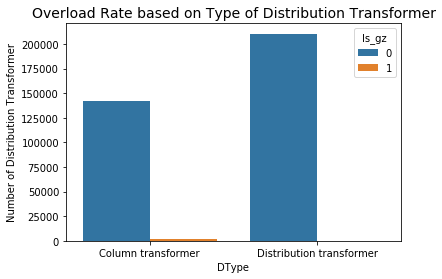

In [5]:
#gender - survival (Find out which gender has a higher survival rate)

print(df_train.groupby(['DType', 'Is_gz'])['Is_gz'].count())

sns.countplot('DType',hue='Is_gz',data=df_train)
plt.title("Overload Rate based on Type of Distribution Transformer",fontsize=14)
plt.xlabel("DType")
plt.ylabel("Number of Distribution Transformer")
plt.show()

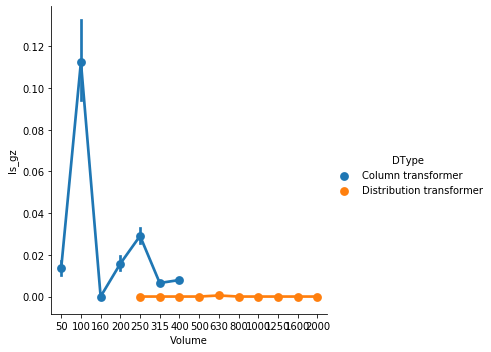

In [27]:
sns.factorplot('Volume','Is_gz','DType', data=df_train)

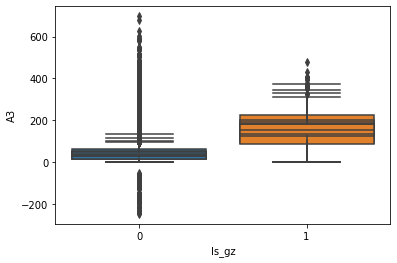

In [14]:
# fig, ax = plt.subplots()

sns.boxplot(x=df_train['Is_gz'], y=df_train['A0'], data = df_train)
sns.boxplot(x=df_train['Is_gz'], y=df_train['A1'], data = df_train)
sns.boxplot(x=df_train['Is_gz'], y=df_train['A2'], data = df_train)
sns.boxplot(x=df_train['Is_gz'], y=df_train['A3'], data = df_train)
# sns.boxplot(x=df_train['Is_gz'], y=df_train['A0'], data = df_train)
# sns.boxplot(x=df_train['Is_gz'], y=df_train['A0'], data = df_train)
# sns.boxplot(x=df_train['Is_gz'], y=df_train['A0'], data = df_train)
# ax.boxplot(x=df_train['Is_gz'], y=df_train['A1'], data = df_train)

# Data Preperation

### Handle missing values 

#### MinTemp & MaxTemp

In [15]:
# Min and max temperature (null values)
#remove the rows/// replace with mean? 

df_train = df_train.dropna()
df_train.head()

,ID,DTNumber,Volume,DDate,DType,MaxTemp,MinTemp,UserNumber,UserName,Terminal,...,A15,A16,A17,A18,A19,A20,A21,A22,A23,Is_gz
0,1,MPB_331,400,2015/5/11,Column transformer,21.6,8.0,T00_58,Name_1,1300261,...,28.96,41.38,95.32,77.67,96.03,99.44,61.69,43.12,26.81,0
1,2,MPB_331,400,2015/5/12,Column transformer,29.7,15.1,T00_58,Name_1,1300261,...,32.97,29.66,89.26,66.02,86.62,105.64,64.61,50.58,34.98,0
2,3,MPB_331,400,2015/5/14,Column transformer,27.2,18.4,T00_58,Name_1,1300261,...,36.31,36.33,71.37,94.70,109.50,88.24,63.66,46.20,34.15,0
3,4,MPB_331,400,2015/5/16,Column transformer,28.0,16.4,T00_58,Name_1,1300261,...,32.40,30.98,87.14,89.75,104.45,92.71,67.89,41.82,35.72,0
4,5,MPB_331,400,2015/5/18,Column transformer,32.7,22.5,T00_58,Name_1,1300261,...,36.62,33.39,99.65,103.16,116.89,100.27,63.09,52.15,39.98,0


In [16]:
#checking purpose (make sure there's no more null values)

#check if all null values are being replaced 
print("Missing Values: \n", df_train.isnull().sum())

Missing Values: 
 ID            0
DTNumber      0
Volume        0
DDate         0
DType         0
MaxTemp       0
MinTemp       0
UserNumber    0
UserName      0
Terminal      0
EMANumber     0
CT            0
PT            0
A0            0
A1            0
A2            0
A3            0
A4            0
A5            0
A6            0
A7            0
A8            0
A9            0
A10           0
A11           0
A12           0
A13           0
A14           0
A15           0
A16           0
A17           0
A18           0
A19           0
A20           0
A21           0
A22           0
A23           0
Is_gz         0
dtype: int64


### Melting columns A0-A23

In [17]:
# melt column A0-A23 (for further exploration purpose on loading values)

df_train2 =df_train.melt(id_vars = ['ID', 'DTNumber', 'Volume', 'DDate','DType','MaxTemp', 'MinTemp',
                             'UserNumber','UserName','Terminal','EMANumber','CT','PT','Is_gz'],
                  var_name = 'operating_point', value_name = 'loading_value')

df_train2.head()

,ID,DTNumber,Volume,DDate,DType,MaxTemp,MinTemp,UserNumber,UserName,Terminal,EMANumber,CT,PT,Is_gz,operating_point,loading_value
0,1,MPB_331,400,2015/5/11,Column transformer,21.6,8.0,T00_58,Name_1,1300261,Num_40129,100,1,0,A0,25.75
1,2,MPB_331,400,2015/5/12,Column transformer,29.7,15.1,T00_58,Name_1,1300261,Num_40129,100,1,0,A0,24.23
2,3,MPB_331,400,2015/5/14,Column transformer,27.2,18.4,T00_58,Name_1,1300261,Num_40129,100,1,0,A0,28.42
3,4,MPB_331,400,2015/5/16,Column transformer,28.0,16.4,T00_58,Name_1,1300261,Num_40129,100,1,0,A0,28.54
4,5,MPB_331,400,2015/5/18,Column transformer,32.7,22.5,T00_58,Name_1,1300261,Num_40129,100,1,0,A0,35.43


Text(0.5, 1.0, 'Overload Rate Based on Loading Values')

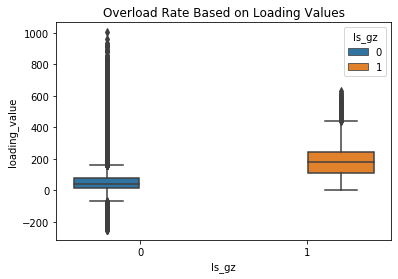

In [19]:
sns.boxplot(x=df_train2['Is_gz'], y=df_train2['loading_value'], hue = 'Is_gz',data = df_train2)
plt.title('Overload Rate Based on Loading Values')

Text(0.5, 1.0, 'Loading Value and Overload Rate on Each Operation Point')

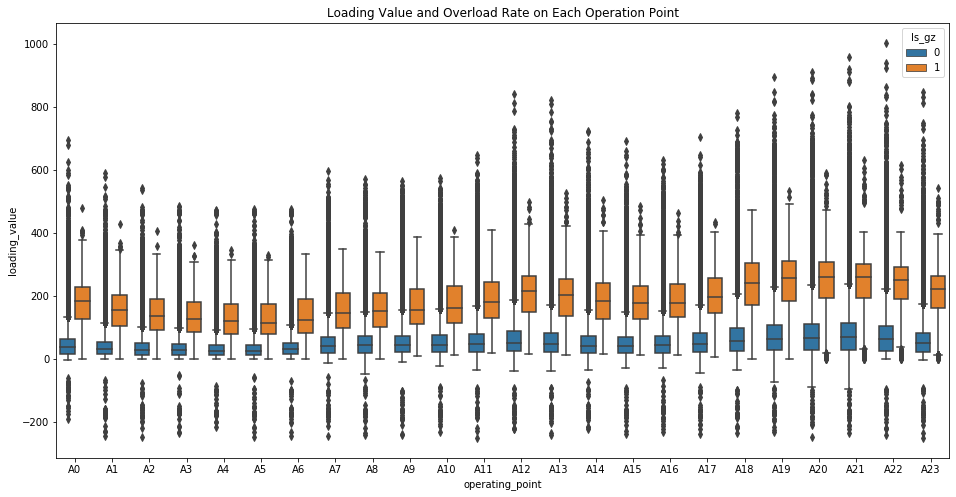

In [20]:
plt.figure(figsize =(16,8))
sns.boxplot(x=df_train2['operating_point'], y=df_train2['loading_value'], hue = 'Is_gz',data = df_train2)
plt.title('Loading Value and Overload Rate on Each Operation Point')

<Figure size 1152x576 with 0 Axes>

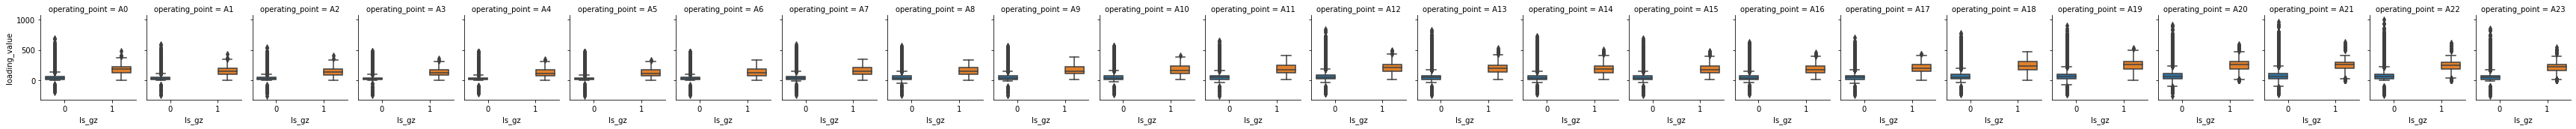

In [22]:
plt.figure(figsize =(16,8))
g = sns.catplot(x="Is_gz", y="loading_value",
                hue="Is_gz", col="operating_point",
                data=df_train2, kind="box",
                height=2.5, aspect=.8)

# Feature Engineering 

In [23]:
#convert DDate into Datetime function 
df_train2['DDate'] =pd.to_datetime(df_train2.DDate, format='%Y/%m/%d')

#extract day of week 
df_train2['dayofWeek'] = df_train2['DDate'].dt.dayofweek
df_train2['dayofWeek'].head()

# 0 = Monday 

0    0
1    1
2    3
3    5
4    0
Name: dayofWeek, dtype: int64

In [24]:
df_train2.head()

,ID,DTNumber,Volume,DDate,DType,MaxTemp,MinTemp,UserNumber,UserName,Terminal,EMANumber,CT,PT,Is_gz,operating_point,loading_value,dayofWeek
0,1,MPB_331,400,2015-05-11,Column transformer,21.6,8.0,T00_58,Name_1,1300261,Num_40129,100,1,0,A0,25.75,0
1,2,MPB_331,400,2015-05-12,Column transformer,29.7,15.1,T00_58,Name_1,1300261,Num_40129,100,1,0,A0,24.23,1
2,3,MPB_331,400,2015-05-14,Column transformer,27.2,18.4,T00_58,Name_1,1300261,Num_40129,100,1,0,A0,28.42,3
3,4,MPB_331,400,2015-05-16,Column transformer,28.0,16.4,T00_58,Name_1,1300261,Num_40129,100,1,0,A0,28.54,5
4,5,MPB_331,400,2015-05-18,Column transformer,32.7,22.5,T00_58,Name_1,1300261,Num_40129,100,1,0,A0,35.43,0


# Data Cleansing

In [26]:
#remove unwanted columns 
df_train3=df_train2.drop(['ID','DTNumber','DDate','UserNumber','UserName','Terminal','EMANumber'],axis=1)
df_train3.head()

,Volume,DType,MaxTemp,MinTemp,CT,PT,Is_gz,operating_point,loading_value,dayofWeek
0,400,Column transformer,21.6,8.0,100,1,0,A0,25.75,0
1,400,Column transformer,29.7,15.1,100,1,0,A0,24.23,1
2,400,Column transformer,27.2,18.4,100,1,0,A0,28.42,3
3,400,Column transformer,28.0,16.4,100,1,0,A0,28.54,5
4,400,Column transformer,32.7,22.5,100,1,0,A0,35.43,0


In [27]:
# Show categorical varibles and numeric variables

tnum_vars=list(df_train3.columns[df_train3.dtypes != "object"])
tcat_vars=list(df_train3.columns[df_train3.dtypes == "object"])
print("Categorical Variables: ",tcat_vars)
print("Numerical Variables: ",tnum_vars)

Categorical Variables:  ['DType', 'operating_point']
Numerical Variables:  ['Volume', 'MaxTemp', 'MinTemp', 'CT', 'PT', 'Is_gz', 'loading_value', 'dayofWeek']


In [28]:
#encode all the categorical variables
nonnumfeats = tcat_vars
print(nonnumfeats)

#Convert Multiple Categorical Data Columns to Numerical Data Columns using Dummy Variables
df_train3 = pd.get_dummies(df_train3,columns=nonnumfeats)

df_train3.head()

['DType', 'operating_point']


,Volume,MaxTemp,MinTemp,CT,PT,Is_gz,loading_value,dayofWeek,DType_Column transformer,DType_Distribution transformer,...,operating_point_A21,operating_point_A22,operating_point_A23,operating_point_A3,operating_point_A4,operating_point_A5,operating_point_A6,operating_point_A7,operating_point_A8,operating_point_A9
0,400,21.6,8.0,100,1,0,25.75,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,400,29.7,15.1,100,1,0,24.23,1,1,0,...,0,0,0,0,0,0,0,0,0,0
2,400,27.2,18.4,100,1,0,28.42,3,1,0,...,0,0,0,0,0,0,0,0,0,0
3,400,28.0,16.4,100,1,0,28.54,5,1,0,...,0,0,0,0,0,0,0,0,0,0
4,400,32.7,22.5,100,1,0,35.43,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# Train Model

## Split Data into Train and Test Sets

In [29]:
from sklearn.model_selection import train_test_split
y = df_train3["Is_gz"].values
X = df_train3.drop(["Is_gz"],axis=1).values

#split data into 80% traning set and 20% testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=44)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import GradientBoostingClassifier

from sklearn import metrics
from sklearn.metrics import accuracy_score

# Trained Model with Algorithm

## Train Model with Algorithm: Logistic Regression

In [31]:
lr_model = LogisticRegression()

#fit logistic regression model to the data 
lr_model.fit(X_train, y_train)

#make predictions 
Y_pred_LR = lr_model.predict(X_test)
print(lr_model)

#summarize the fit of the model
print(metrics.classification_report(y_test,Y_pred_LR))
print(metrics.confusion_matrix(y_test, Y_pred_LR))

#accuracy score for both train set and test set
score_lr=round(accuracy_score(y_train, lr_model.predict(X_train))*100,2)
acc_lr=round(accuracy_score(y_test, Y_pred_LR)*100,2)
print("Accuracy score for the train set={:.2f}%".format(score_lr))
print("Accuracy score for the test set={:.2f}%".format(acc_lr))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1687355
           1       0.69      0.28      0.40      6935

    accuracy                           1.00   1694290
   macro avg       0.84      0.64      0.70   1694290
weighted avg       1.00      1.00      1.00   1694290

[[1686479     876]
 [   4991    1944]]
Accuracy score for the train set=99.66%
Accuracy score for the test set=99.65%


## Train Model with Algorithm: Random Forest 

In [32]:
random_forest = RandomForestClassifier()

#fit random forest model to the data 
random_forest.fit(X_train, y_train)

#make predictions 
Y_pred_RF = random_forest.predict(X_test)
print(random_forest)

#summarize the fit of the model
print(metrics.classification_report(y_test,Y_pred_RF))
print(metrics.confusion_matrix(y_test, Y_pred_RF))

#accuracy score for both test and train set
score_rf=round(accuracy_score(y_train, random_forest.predict(X_train))*100,2)
acc_rf=round(accuracy_score(y_test, Y_pred_RF)*100,2)
print("Accuracy score for the train set={:.2f}%".format(score_rf))
print("Accuracy score for the test set={:.2f}%".format(acc_rf))

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
              precision    recall  f1-score   support

           0       1.00      1.00      1.00   1687355
           1       0.81      0.57      0.67      6935

    accuracy                           1.00   1694290
   macro avg       0.90      0.78      0.83   1694290
weighted avg       1.00      1.00      1.00   1694290

[[1686434     921]
 [   2988    3947]]
Accuracy score for the train set=100.00%
Accuracy score for the test set=99.77%


## Train Model with Algorithm: K Nearest Neighbors

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors = 3) 

#fit KNN model to the data 
knn_model.fit(X_train, y_train)  

#make predictions 
Y_pred_KNN = knn_model.predict(X_test)  
print(knn_model)

#summarize the fit of the model
print(metrics.classification_report(y_test,Y_pred_RF))
print(metrics.confusion_matrix(y_test, Y_pred_RF))

#accuracy score for both test and train set
score_knn=round(accuracy_score(y_train, knn_model.predict(X_train))*100,2)
acc_knn=round(accuracy_score(y_test, Y_pred_KNN)*100,2)
print("Accuracy score for the train set={:.2f}%".format(score_knn))
print("Accuracy score for the test set={:.2f}%".format(acc_knn))

## Train Model with Algorithm: Support Vector Classifier

In [ ]:
svc_model = LinearSVC()

#fit random forest model to the data 
svc_model.fit(X_train, y_train)

#prediction
Y_pred_SVC = svc_model.predict(X_test)
print(svc_model)

#summarize the fit of the model
print(metrics.classification_report(y_test,Y_pred_SVC))
print(metrics.confusion_matrix(y_test, Y_pred_SVC))

#accuracy score for test and train score
score_svc=round(accuracy_score(y_train, svc_model.predict(X_train))*100,2)
acc_svc=round(accuracy_score(y_test, Y_pred_SVC)*100,2)
print("Accuracy score for the train set={:.2f}%".format(score_svc))
print("Accuracy score for the test set={:.2f}%".format(acc_svc))

## Train Model with Algorithm: Gradient Boosting Classifier

In [ ]:
gbc_model= GradientBoostingClassifier()

#fit random forest model to the data 
gbc_model.fit(X_train, y_train)

Y_pred_GBC = gbc_model.predict(X_test)
print(gbc_model)

#summarize the fit of the model
print(metrics.classification_report(y_test,Y_pred_GBC))
print(metrics.confusion_matrix(y_test, Y_pred_GBC))

#accuracy score
score_gbc=round(accuracy_score(y_train, gbc_model.predict(X_train))*100,2)
acc_gbc=round(accuracy_score(y_test, Y_pred_GBC)*100,2)
print("Accuracy score for the train set={:.2f}%".format(score_gbc))
print("Accuracy score for the test set={:.2f}%".format(acc_gbc))

## Overview of all Trainned Models

In [ ]:
#list out all the trained models and put them into a dataframe
models = pd.DataFrame({
    'Trainned Model': ['Logistic Regression','Random Forest','K Nearest Neighbor',
                       'Support Vector Classifier','Gradient Boosting Classifier'],
    'Score': [acc_lr, acc_rf, acc_knn, 
              acc_svc, acc_gbc]})
models_df = models.sort_values(by='Score', ascending=False)
models_df = models_df.set_index('Score')
models_df